# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Various Data Loads

In [6]:
tips = sns.load_dataset("tips")
X = tips.drop(columns=["tip"])
y = tips["tip"]
display(X)
display(y)

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names).join(
    pd.Series(iris["target"], name="species")
)

df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df = pd.read_csv("./data/housing.csv")
df

# Overview - History of Neural Networks

Generalized, functional learning algorithms were first developed for multilayer perceptrons and used a "feedforward" design (compared to backpropagation). Alexey Ivakhnenko and V. G. Lapa first published their work in 1967 in Cybernetics and Forecasting Techniques. Then, in 1971, Ivakhnenko published a paper called "Polynomial Theory of Complex Systems," in which he described a deep network with eight layers that was trained by the group method.

After researching backpropagation for his 1974 dissertation, Paul Werbos was the first person in the United States to propose using it for artificial neural networks. Backpropagation is a method for processing errors at the output (not at the input) and distributing them backward through the system's layers for training and learning. It has become a popular method for training deep neural networks.

Lastly, deep learning became a reality in 1989 when Yann LeCun and his colleagues experimented with the standard backpropagation algorithm (created in 1970) and applied it to a neural network. They aimed to teach the computer how to recognize handwritten ZIP codes on mail. This new system worked, and it was the beginning of deep learning.

# 22.1 Introduction to Neural Networks

First used successfully for image classification. Consider an MxN image with 3 color channels
- Has MxNx3 total features, or MxNx3 dimensionality
- While you could develop decision trees on this, would have to be giant data set to avoid risk of overfitting
- A good first step is to pre-process to capture most important features in image to reduce its dimensionality
- Example histogram of gradient (hog)
- For some time focus was on developing best such pre-processing steps

Standard data sets of importance for comparing classifier performance, for example imagenet
- Big database of labeled images
- Contest was held for years for people to enter their best classifier performance
- Step change in performance seen with alexnet, which was a neural network (vs the computer vision approach)

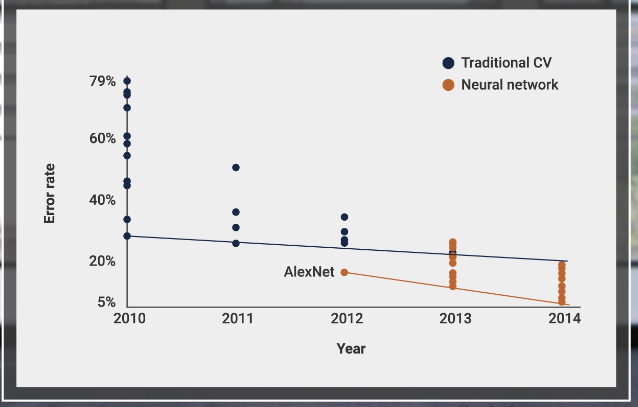